## New York Taxi Prediction

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.


Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

#### The predicted results are ranked at the top 19% of the Kaggle leaderboard as of April 2021

File descriptions
train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)
sample_submission.csv - a sample submission file in the correct format
Data fields
id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd
df = pd.read_csv("taxi/train.csv")
df2 = pd.read_csv("taxi/test.csv")

In [2]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df2.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [6]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df2.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
df = df.drop("id", axis=1)
df2 = df2.drop("id", axis=1)

In [9]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df.drop(['pickup_datetime'], axis=1, inplace=True)

df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])
df2['pickup_month'] = df2['pickup_datetime'].dt.month
df2['pickup_day'] = df2['pickup_datetime'].dt.day
df2['pickup_weekday'] = df2['pickup_datetime'].dt.weekday
df2['pickup_hour'] = df2['pickup_datetime'].dt.hour
df2['pickup_minute'] = df2['pickup_datetime'].dt.minute
df2['pickup_second'] = df2['pickup_datetime'].dt.second
df2['pickup_dayofweek'] = df2['pickup_datetime'].dt.dayofweek
df2.drop(['pickup_datetime'], axis=1, inplace=True)

In [11]:
df.drop(['dropoff_datetime'], axis=1, inplace=True)

In [12]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,0,17,24,55,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,6,0,43,35,6
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,1,11,35,24,1
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,2,19,32,31,2
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,5,13,30,55,5


In [13]:
df2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,6,30,3,23,59,58,3
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,6,30,3,23,59,53,3
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,6,30,3,23,59,47,3
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,6,30,3,23,59,41,3
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,6,30,3,23,59,33,3


In [14]:
df['vendor_id'].nunique()

2

In [15]:
df['store_and_fwd_flag'].nunique()

2

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  object 
 7   trip_duration       1458644 non-null  int64  
 8   pickup_month        1458644 non-null  int64  
 9   pickup_day          1458644 non-null  int64  
 10  pickup_weekday      1458644 non-null  int64  
 11  pickup_hour         1458644 non-null  int64  
 12  pickup_minute       1458644 non-null  int64  
 13  pickup_second       1458644 non-null  int64  
 14  pickup_dayofweek    1458644 non-null  int64  
dtypes: float64(4), 

In [17]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df2['store_and_fwd_flag'] = df2['store_and_fwd_flag'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   vendor_id           1458644 non-null  int64   
 1   passenger_count     1458644 non-null  int64   
 2   pickup_longitude    1458644 non-null  float64 
 3   pickup_latitude     1458644 non-null  float64 
 4   dropoff_longitude   1458644 non-null  float64 
 5   dropoff_latitude    1458644 non-null  float64 
 6   store_and_fwd_flag  1458644 non-null  category
 7   trip_duration       1458644 non-null  int64   
 8   pickup_month        1458644 non-null  int64   
 9   pickup_day          1458644 non-null  int64   
 10  pickup_weekday      1458644 non-null  int64   
 11  pickup_hour         1458644 non-null  int64   
 12  pickup_minute       1458644 non-null  int64   
 13  pickup_second       1458644 non-null  int64   
 14  pickup_dayofweek    1458644 non-null  int64   
dty

In [19]:
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'], prefix='store_and_fwd')], axis=1)
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'], prefix='vendor')], axis=1)
df.drop(['vendor_id'], axis=1, inplace=True)

df2 = pd.concat([df2, pd.get_dummies(df2['store_and_fwd_flag'], prefix='store_and_fwd')], axis=1)
df2.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df2 = pd.concat([df2, pd.get_dummies(df2['vendor_id'], prefix='vendor')], axis=1)
df2.drop(['vendor_id'], axis=1, inplace=True)

In [20]:
df.head(3)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,store_and_fwd_N,store_and_fwd_Y,vendor_1,vendor_2
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,24,55,0,1,0,0,1
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,43,35,6,1,0,1,0
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,35,24,1,1,0,0,1


In [21]:
#df2.head(3)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1458644 non-null  int64  
 1   pickup_longitude   1458644 non-null  float64
 2   pickup_latitude    1458644 non-null  float64
 3   dropoff_longitude  1458644 non-null  float64
 4   dropoff_latitude   1458644 non-null  float64
 5   trip_duration      1458644 non-null  int64  
 6   pickup_month       1458644 non-null  int64  
 7   pickup_day         1458644 non-null  int64  
 8   pickup_weekday     1458644 non-null  int64  
 9   pickup_hour        1458644 non-null  int64  
 10  pickup_minute      1458644 non-null  int64  
 11  pickup_second      1458644 non-null  int64  
 12  pickup_dayofweek   1458644 non-null  int64  
 13  store_and_fwd_N    1458644 non-null  uint8  
 14  store_and_fwd_Y    1458644 non-null  uint8  
 15  vendor_1           1458644 non-n

In [23]:
import numpy as np
df['dist_long'] = df['pickup_longitude'] - df['dropoff_longitude']
df['dist_lat'] = df['pickup_latitude'] - df['dropoff_latitude']
df['euclidean_distance'] = np.sqrt(np.square(df['pickup_longitude'] - df['dropoff_longitude']) + np.square(df['pickup_latitude'] - df['dropoff_latitude']))

df2['dist_long'] = df2['pickup_longitude'] - df2['dropoff_longitude']
df2['dist_lat'] = df2['pickup_latitude'] - df2['dropoff_latitude']
df2['euclidean_distance'] = np.sqrt(np.square(df2['pickup_longitude'] - df2['dropoff_longitude']) + np.square(df2['pickup_latitude'] - df2['dropoff_latitude']))

In [24]:
from sklearn.decomposition import PCA

coords = np.vstack((df[['pickup_latitude', 'pickup_longitude']].values,
                    df[['dropoff_latitude', 'dropoff_longitude']].values,
                    df[['pickup_latitude', 'pickup_longitude']].values,
                    df[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)
df['pickup_pca0'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 0]
df['pickup_pca1'] = pca.transform(df[['pickup_latitude', 'pickup_longitude']])[:, 1]
df['dropoff_pca0'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df['dropoff_pca1'] = pca.transform(df[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
df2['pickup_pca0'] = pca.transform(df2[['pickup_latitude', 'pickup_longitude']])[:, 0]
df2['pickup_pca1'] = pca.transform(df2[['pickup_latitude', 'pickup_longitude']])[:, 1]
df2['dropoff_pca0'] = pca.transform(df2[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
df2['dropoff_pca1'] = pca.transform(df2[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

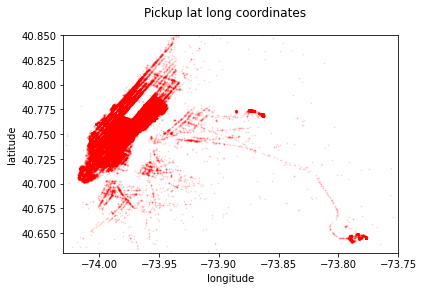

In [25]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=1)
long_border = (-74.03, -73.75)
lat_border = (40.63, 40.85)

ax.scatter(df['pickup_longitude'].values[:100000], df['pickup_latitude'].values[:100000],
              color='red', s=1, alpha=0.1)
fig.suptitle('Pickup lat long coordinates')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
plt.show()

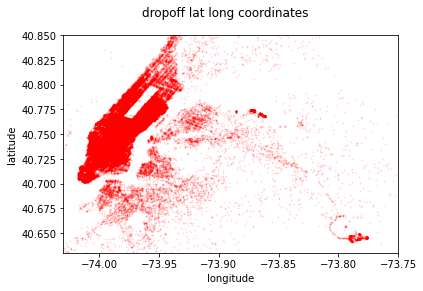

In [26]:
fig, ax = plt.subplots(ncols=1)

ax.scatter(df['dropoff_longitude'].values[:100000], df['dropoff_latitude'].values[:100000],
              color='red', s=1, alpha=0.1)
fig.suptitle('dropoff lat long coordinates')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
plt.show()

(-0.13197076410472497, 0.10124633610809924)

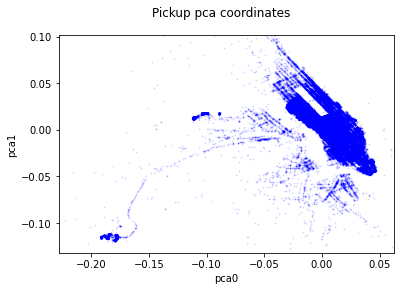

In [27]:
fig, ax = plt.subplots(ncols=1)

ax.scatter(df['pickup_pca0'].values[:100000], df['pickup_pca1'].values[:100000],
              color='blue', s=1, alpha=0.1)
fig.suptitle('Pickup pca coordinates')
ax.set_xlabel('pca0')
ax.set_ylabel('pca1')
pca_borders = pca.transform([[x, y] for x in lat_border for y in long_border])
ax.set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax.set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

(-0.13197076410472497, 0.10124633610809924)

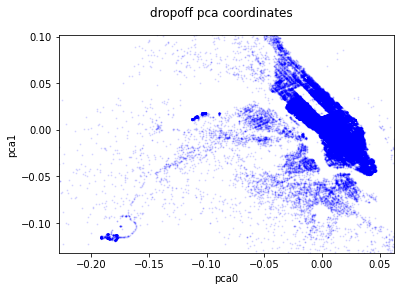

In [28]:
fig, ax = plt.subplots(ncols=1)

ax.scatter(df['dropoff_pca0'].values[:100000], df['dropoff_pca1'].values[:100000],
              color='blue', s=1, alpha=0.1)
fig.suptitle('dropoff pca coordinates')
ax.set_xlabel('pca0')
ax.set_ylabel('pca1')
pca_borders = pca.transform([[x, y] for x in lat_border for y in long_border])
ax.set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax.set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

In [29]:
df.loc[:, 'center_latitude'] = (df['pickup_latitude'].values + df['dropoff_latitude'].values) / 2
df.loc[:, 'center_longitude'] = (df['pickup_longitude'].values + df['dropoff_longitude'].values) / 2
df2.loc[:, 'center_latitude'] = (df2['pickup_latitude'].values + df2['dropoff_latitude'].values) / 2
df2.loc[:, 'center_longitude'] = (df2['pickup_longitude'].values + df2['dropoff_longitude'].values) / 2

In [30]:
df.head(3)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,vendor_2,dist_long,dist_lat,euclidean_distance,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,center_latitude,center_longitude
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,1,-0.017525,0.002335,0.017680,0.007896,0.016976,-0.009496,0.013801,40.766769,-73.973392
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,0,0.019066,0.007412,0.020456,0.007572,-0.012447,0.026972,-0.018933,40.734858,-73.989948
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,1,0.026306,0.053852,0.059934,0.004964,0.012832,0.033831,-0.039692,40.737013,-73.992180


In [31]:
df['center_pca0'] = pca.transform(df[['center_latitude', 'center_longitude']])[:, 0]
df['center_pca1'] = pca.transform(df[['center_latitude', 'center_longitude']])[:, 1]
df2['center_pca0'] = pca.transform(df2[['center_latitude', 'center_longitude']])[:, 0]
df2['center_pca1'] = pca.transform(df2[['center_latitude', 'center_longitude']])[:, 1]

In [32]:
df.head(3)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,dist_lat,euclidean_distance,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,center_latitude,center_longitude,center_pca0,center_pca1
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,0.002335,0.017680,0.007896,0.016976,-0.009496,0.013801,40.766769,-73.973392,-0.000800,0.015389
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,0.007412,0.020456,0.007572,-0.012447,0.026972,-0.018933,40.734858,-73.989948,0.017272,-0.015690
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,0.053852,0.059934,0.004964,0.012832,0.033831,-0.039692,40.737013,-73.992180,0.019397,-0.013430


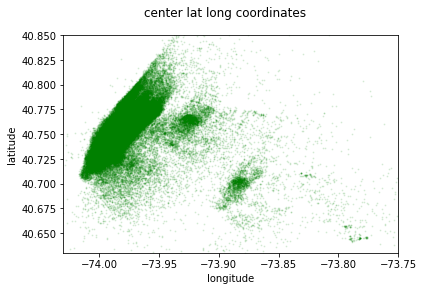

In [33]:
fig, ax = plt.subplots(ncols=1)

ax.scatter(df['center_longitude'].values[:100000], df['center_latitude'].values[:100000],
              color='green', s=1, alpha=0.1)
fig.suptitle('center lat long coordinates')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
plt.show()

(-0.13197076410472497, 0.10124633610809924)

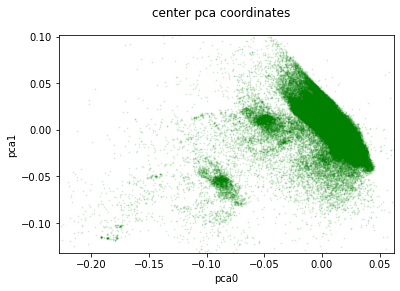

In [34]:
fig, ax = plt.subplots(ncols=1)

ax.scatter(df['center_pca0'].values[:100000], df['center_pca1'].values[:100000],
              color='green', s=1, alpha=0.1)
fig.suptitle('center pca coordinates')
ax.set_xlabel('pca0')
ax.set_ylabel('pca1')
pca_borders = pca.transform([[x, y] for x in lat_border for y in long_border])
ax.set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax.set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())

In [35]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

df.loc[:, 'pickup_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
df.loc[:, 'dropoff_cluster'] = kmeans.predict(df[['dropoff_latitude', 'dropoff_longitude']])
df.loc[:, 'center_cluster'] = kmeans.predict(df[['center_latitude', 'center_longitude']])
df2.loc[:, 'pickup_cluster'] = kmeans.predict(df2[['pickup_latitude', 'pickup_longitude']])
df2.loc[:, 'dropoff_cluster'] = kmeans.predict(df2[['dropoff_latitude', 'dropoff_longitude']])
df2.loc[:, 'center_cluster'] = kmeans.predict(df2[['center_latitude', 'center_longitude']])

In [36]:
df.head(3)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,pickup_pca1,dropoff_pca0,dropoff_pca1,center_latitude,center_longitude,center_pca0,center_pca1,pickup_cluster,dropoff_cluster,center_cluster
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,0.016976,-0.009496,0.013801,40.766769,-73.973392,-0.000800,0.015389,94,78,0
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-0.012447,0.026972,-0.018933,40.734858,-73.989948,0.017272,-0.015690,86,2,16
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,0.012832,0.033831,-0.039692,40.737013,-73.992180,0.019397,-0.013430,37,93,16


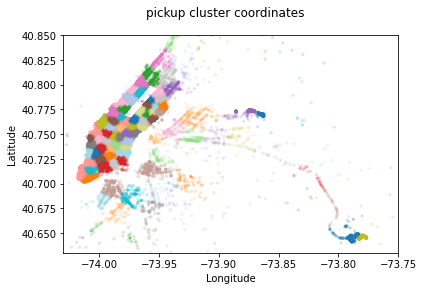

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df['pickup_longitude'].values[:100000], df['pickup_latitude'].values[:100000], s=10, lw=0,
           c=df.pickup_cluster[:100000].values, cmap='tab20', alpha=0.2)
fig.suptitle('pickup cluster coordinates')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

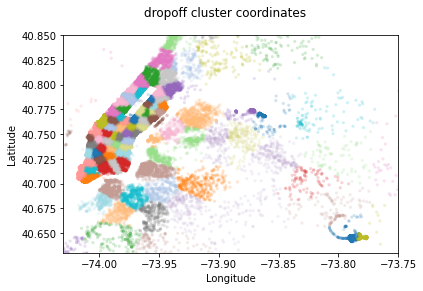

In [38]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df['dropoff_longitude'].values[:100000], df['dropoff_latitude'].values[:100000], s=10, lw=0,
           c=df.dropoff_cluster[:100000].values, cmap='tab20', alpha=0.2)
fig.suptitle('dropoff cluster coordinates')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

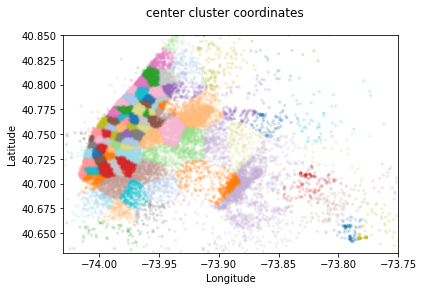

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(df['center_longitude'].values[:100000], df['center_latitude'].values[:100000], s=10, lw=0,
           c=df.center_cluster[:100000].values, cmap='tab20', alpha=0.2)
fig.suptitle('center cluster coordinates')
ax.set_xlim(long_border)
ax.set_ylim(lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [40]:
df['rot_45_pickup_latitude'] = (0.707 * df['pickup_latitude']) + (0.707 * df['pickup_longitude'])
df['rot_45_pickup_longitude'] = (0.707 * df['pickup_longitude']) + (0.707 * df['pickup_latitude'])
df['rot_30_pickup_latitude'] = (0.866 * df['pickup_latitude']) + (0.5 * df['pickup_longitude'])
df['rot_30_pickup_longitude'] = (0.866 * df['pickup_longitude']) + (0.5 * df['pickup_latitude'])

df['rot_45_dropoff_latitude'] = (0.707 * df['dropoff_latitude']) + (0.707 * df['dropoff_longitude'])
df['rot_45_dropoff_longitude'] = (0.707 * df['dropoff_longitude']) + (0.707 * df['dropoff_latitude'])
df['rot_30_dropoff_latitude'] = (0.866 * df['dropoff_latitude']) + (0.5 * df['dropoff_longitude'])
df['rot_30_dropoff_longitude'] = (0.866 * df['dropoff_longitude']) + (0.5 * df['dropoff_latitude'])

df['rot_45_center_latitude'] = (0.707 * df['center_latitude']) + (0.707 * df['center_longitude'])
df['rot_45_center_longitude'] = (0.707 * df['center_longitude']) + (0.707 * df['center_latitude'])
df['rot_30_center_latitude'] = (0.866 * df['center_latitude']) + (0.5 * df['center_longitude'])
df['rot_30_center_longitude'] = (0.866 * df['center_longitude']) + (0.5 * df['center_latitude'])

df2['rot_45_pickup_latitude'] = (0.707 * df2['pickup_latitude']) + (0.707 * df2['pickup_longitude'])
df2['rot_45_pickup_longitude'] = (0.707 * df2['pickup_longitude']) + (0.707 * df2['pickup_latitude'])
df2['rot_30_pickup_latitude'] = (0.866 * df2['pickup_latitude']) + (0.5 * df2['pickup_longitude'])
df2['rot_30_pickup_longitude'] = (0.866 * df2['pickup_longitude']) + (0.5 * df2['pickup_latitude'])

df2['rot_45_dropoff_latitude'] = (0.707 * df2['dropoff_latitude']) + (0.707 * df2['dropoff_longitude'])
df2['rot_45_dropoff_longitude'] = (0.707 * df2['dropoff_longitude']) + (0.707 * df2['dropoff_latitude'])
df2['rot_30_dropoff_latitude'] = (0.866 * df2['dropoff_latitude']) + (0.5 * df2['dropoff_longitude'])
df2['rot_30_dropoff_longitude'] = (0.866 * df2['dropoff_longitude']) + (0.5 * df2['dropoff_latitude'])

df2['rot_45_center_latitude'] = (0.707 * df2['center_latitude']) + (0.707 * df2['center_longitude'])
df2['rot_45_center_longitude'] = (0.707 * df2['center_longitude']) + (0.707 * df2['center_latitude'])
df2['rot_30_center_latitude'] = (0.866 * df2['center_latitude']) + (0.5 * df2['center_longitude'])
df2['rot_30_center_longitude'] = (0.866 * df2['center_longitude']) + (0.5 * df2['center_latitude'])

In [41]:
df2.head(3)

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,...,rot_30_pickup_latitude,rot_30_pickup_longitude,rot_45_dropoff_latitude,rot_45_dropoff_longitude,rot_30_dropoff_latitude,rot_30_dropoff_longitude,rot_45_center_latitude,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude
0,1,-73.988129,40.732029,-73.990173,40.756680,6,30,3,23,59,...,-1.720127,-43.707705,-23.496080,-23.496080,-1.699802,-43.697150,-23.504071,-23.504071,-1.709965,-43.702428
1,1,-73.964203,40.679993,-73.959808,40.655403,6,30,3,23,59,...,-1.753228,-43.713003,-23.546214,-23.546214,-1.772325,-43.721492,-23.539076,-23.539076,-1.762776,-43.717248
2,1,-73.997437,40.737583,-73.986160,40.729523,6,30,3,23,59,...,-1.719971,-43.712988,-23.512443,-23.512443,-1.721313,-43.707253,-23.513580,-23.513580,-1.720642,-43.710121


In [42]:
from geopy.distance import great_circle
from geopy.distance import geodesic

def calculate_great_circle_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    pickup = [pickup_lat, pickup_long]
    dropoff = [dropoff_lat, dropoff_long]
    distance = great_circle(pickup, dropoff)
    return distance

def calculate_geodesic_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    pickup = [pickup_lat, pickup_long]
    dropoff = [dropoff_lat, dropoff_long]
    distance = geodesic(pickup, dropoff)
    return distance

def calculate_manhattan_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    pickup = [pickup_lat, pickup_long]
    dropoff_a = [pickup_lat, dropoff_long]
    dropoff_b = [dropoff_lat, pickup_long]
    distance_a = great_circle(pickup, dropoff_a).km
    distance_b = great_circle(pickup, dropoff_b).km
    return distance_a + distance_b

def calculate_haversine(lat1, lng1, lat2, lng2):
    '''
    Calculate distance between 2 points based on roundness of Earth
    '''
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def calculate_bearing(lat1, lng1, lat2, lng2):
    '''
    Calaulate bearing(direction) of 2 points based on roundness of Earth
    '''
    AVG_EARTH_RADIUS = 6371800  # in m
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [43]:
df['haversine_distance'] = calculate_haversine(df['pickup_latitude'].values,
                                       df['pickup_longitude'].values, 
                                       df['dropoff_latitude'].values,
                                       df['dropoff_longitude'].values)

df['bearing'] = calculate_bearing(df['pickup_latitude'].values,
                                       df['pickup_longitude'].values, 
                                       df['dropoff_latitude'].values,
                                       df['dropoff_longitude'].values)

# df['great_circle_distance'] = calculate_great_circle_distance(df['pickup_latitude'].values,
#                                        df['pickup_longitude'].values, 
#                                        df['dropoff_latitude'].values,
#                                        df['dropoff_longitude'].values)

# df['manhattan_distance'] = calculate_manhattan_distance(df['pickup_latitude'].values,
#                                        df['pickup_longitude'].values, 
#                                        df['dropoff_latitude'].values,
#                                        df['dropoff_longitude'].values)

df['great_circle_distance'] = df.apply(lambda x: great_circle((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km, axis = 1)
df['manhattan_distance'] = df.apply(lambda x: calculate_manhattan_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)
df.loc[:, 'pca_manhattan'] = np.abs(df['dropoff_pca1'] - df['pickup_pca1']) + np.abs(df['dropoff_pca0'] - df['pickup_pca0'])
df.loc[:, 'distance_halved'] = df['great_circle_distance'] / 2

df2['haversine_distance'] = calculate_haversine(df2['pickup_latitude'].values,
                                       df2['pickup_longitude'].values, 
                                       df2['dropoff_latitude'].values,
                                       df2['dropoff_longitude'].values)

df2['bearing'] = calculate_bearing(df2['pickup_latitude'].values,
                                       df2['pickup_longitude'].values, 
                                       df2['dropoff_latitude'].values,
                                       df2['dropoff_longitude'].values)

# df['great_circle_distance'] = calculate_great_circle_distance(df['pickup_latitude'].values,
#                                        df['pickup_longitude'].values, 
#                                        df['dropoff_latitude'].values,
#                                        df['dropoff_longitude'].values)

# df['manhattan_distance'] = calculate_manhattan_distance(df['pickup_latitude'].values,
#                                        df['pickup_longitude'].values, 
#                                        df['dropoff_latitude'].values,
#                                        df['dropoff_longitude'].values)

df2['great_circle_distance'] = df2.apply(lambda x: great_circle((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km, axis = 1)
df2['manhattan_distance'] = df2.apply(lambda x: calculate_manhattan_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)
df2.loc[:, 'pca_manhattan'] = np.abs(df2['dropoff_pca1'] - df2['pickup_pca1']) + np.abs(df2['dropoff_pca0'] - df2['pickup_pca0'])
df2.loc[:, 'distance_halved'] = df2['great_circle_distance'] / 2

In [44]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_latitude,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,-23.477083,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-23.511349,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,-23.511403,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554
3,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,...,-23.541551,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750
4,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,...,-23.461882,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295


In [45]:
df2.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,...,rot_45_center_latitude,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved
0,1,-73.988129,40.732029,-73.990173,40.756680,6,30,3,23,59,...,-23.504071,-23.504071,-1.709965,-43.702428,2.746426,-3.595224,2.746430,2.913308,0.025577,1.373215
1,1,-73.964203,40.679993,-73.959808,40.655403,6,30,3,23,59,...,-23.539076,-23.539076,-1.762776,-43.717248,2.759239,172.278835,2.759243,3.104810,0.027979,1.379621
2,1,-73.997437,40.737583,-73.986160,40.729523,6,30,3,23,59,...,-23.513580,-23.513580,-1.720642,-43.710121,1.306155,133.326248,1.306157,1.846343,0.019469,0.653079
3,1,-73.956070,40.771900,-73.986427,40.730469,6,30,3,23,59,...,-23.486585,-23.486585,-1.695099,-43.683509,5.269088,-150.956833,5.269095,7.163357,0.072238,2.634548
4,1,-73.970215,40.761475,-73.961510,40.755890,6,30,3,23,59,...,-23.477476,-23.477476,-1.685912,-43.675096,0.960842,130.260381,0.960843,1.354166,0.014423,0.480422


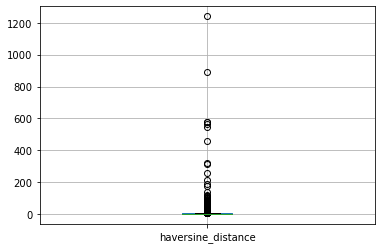

In [46]:
df.boxplot(column='haversine_distance', return_type='axes');

In [47]:
df = df[(df.haversine_distance < 200)]
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_latitude,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,-23.477083,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-23.511349,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,-23.511403,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554
3,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,...,-23.541551,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750
4,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,...,-23.461882,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,778,4,8,4,13,...,-23.504717,-23.504717,-1.710974,-43.702667,1.225080,-119.059338,1.225082,1.665897,0.017688,0.612541
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,10,6,7,...,-23.482017,-23.482017,-1.684263,-43.685518,6.049836,25.342196,6.049844,8.058592,0.080722,3.024922
1458641,1,-73.959129,40.768799,-74.004433,40.707371,764,4,22,4,6,...,-23.503293,-23.503293,-1.711709,-43.699180,7.824606,-150.788492,7.824617,10.645661,0.107384,3.912308
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,1,5,1,15,...,-23.490267,-23.490267,-1.697007,-43.688714,1.092564,35.033294,1.092565,1.521852,0.015502,0.546283


In [48]:
df['speed'] = df.haversine_distance / df.trip_duration

In [49]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,speed
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261,0.003293
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755,0.002723
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554,0.003006
3,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,...,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750,0.003463
4,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,...,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295,0.002732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,778,4,8,4,13,...,-23.504717,-1.710974,-43.702667,1.225080,-119.059338,1.225082,1.665897,0.017688,0.612541,0.001575
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,10,6,7,...,-23.482017,-1.684263,-43.685518,6.049836,25.342196,6.049844,8.058592,0.080722,3.024922,0.009236
1458641,1,-73.959129,40.768799,-74.004433,40.707371,764,4,22,4,6,...,-23.503293,-1.711709,-43.699180,7.824606,-150.788492,7.824617,10.645661,0.107384,3.912308,0.010242
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,1,5,1,15,...,-23.490267,-1.697007,-43.688714,1.092564,35.033294,1.092565,1.521852,0.015502,0.546283,0.002929


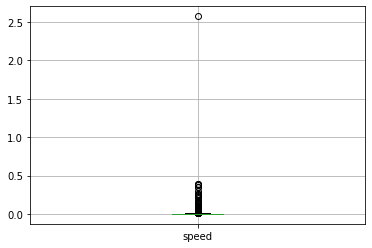

In [50]:
df.boxplot(column='speed', return_type='axes');

In [51]:
#Remove speed outliers
df = df[(df.speed < 0.5)]
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,speed
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261,0.003293
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755,0.002723
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554,0.003006
3,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,...,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750,0.003463
4,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,...,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295,0.002732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,778,4,8,4,13,...,-23.504717,-1.710974,-43.702667,1.225080,-119.059338,1.225082,1.665897,0.017688,0.612541,0.001575
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,10,6,7,...,-23.482017,-1.684263,-43.685518,6.049836,25.342196,6.049844,8.058592,0.080722,3.024922,0.009236
1458641,1,-73.959129,40.768799,-74.004433,40.707371,764,4,22,4,6,...,-23.503293,-1.711709,-43.699180,7.824606,-150.788492,7.824617,10.645661,0.107384,3.912308,0.010242
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,1,5,1,15,...,-23.490267,-1.697007,-43.688714,1.092564,35.033294,1.092565,1.521852,0.015502,0.546283,0.002929


In [52]:
df['geodesic_distance'] = df.apply(lambda x: geodesic((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km, axis = 1)
df2['geodesic_distance'] = df2.apply(lambda x: geodesic((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km, axis = 1)

<ipython-input-52-ddd277d04422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geodesic_distance'] = df.apply(lambda x: geodesic((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km, axis = 1)


In [53]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# x = df.haversine_distance.values.reshape(-1, 1)
# x_scaled = min_max_scaler.fit_transform(x)
# df['haversine_distance'] = pd.DataFrame(x_scaled)

In [54]:
df.drop("speed", axis=1, inplace=True)

C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,geodesic_distance
0,1,-73.982155,40.767937,-73.964630,40.765602,455,3,14,0,17,...,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261,1.502172
1,1,-73.980415,40.738564,-73.999481,40.731152,663,6,12,6,0,...,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755,1.808660
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,1,19,1,11,...,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554,6.379687
3,1,-74.010040,40.719971,-74.012268,40.706718,429,4,6,2,19,...,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750,1.483632
4,1,-73.973053,40.793209,-73.972923,40.782520,435,3,26,5,13,...,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295,1.187038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,778,4,8,4,13,...,-23.504717,-1.710974,-43.702667,1.225080,-119.059338,1.225082,1.665897,0.017688,0.612541,1.227090
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,10,6,7,...,-23.482017,-1.684263,-43.685518,6.049836,25.342196,6.049844,8.058592,0.080722,3.024922,6.046212
1458641,1,-73.959129,40.768799,-74.004433,40.707371,764,4,22,4,6,...,-23.503293,-1.711709,-43.699180,7.824606,-150.788492,7.824617,10.645661,0.107384,3.912308,7.821532
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,1,5,1,15,...,-23.490267,-1.697007,-43.688714,1.092564,35.033294,1.092565,1.521852,0.015502,0.546283,1.092524


In [56]:
#df2

In [57]:
#df

<ipython-input-58-e3084cff9879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_trip_duration'] = np.log(df['trip_duration'])
C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-58-e3084cff9879>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_distance'] = np.log(df['haversine_distance'])


<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

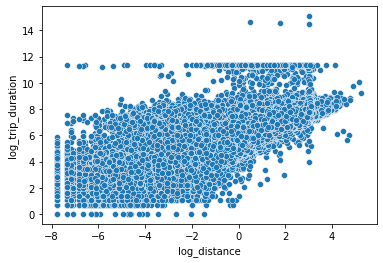

In [58]:
df['log_trip_duration'] = np.log(df['trip_duration'])
df['log_distance'] = np.log(df['haversine_distance'])
import seaborn as sns
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

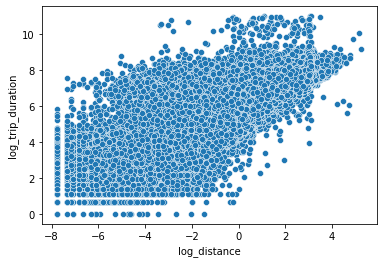

In [59]:
df = df[df.log_trip_duration < 11]
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [60]:
df.drop("log_trip_duration", axis=1, inplace=True)
df.drop("log_distance", axis=1, inplace=True)

C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
#df

C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Trip Duration')

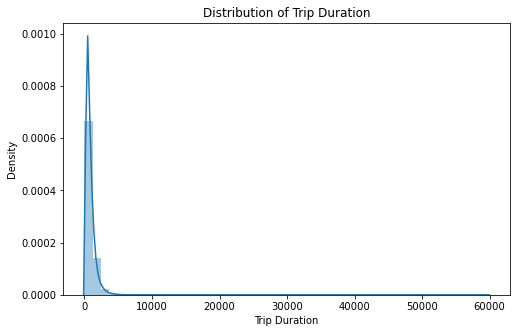

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.distplot(df['trip_duration']).set_title("Distribution of Trip Duration")
plt.xlabel("Trip Duration")

In [63]:
df['trip_duration'] = np.log(df['trip_duration'].values)

<ipython-input-63-31a730a5557e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration'] = np.log(df['trip_duration'].values)


In [64]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,geodesic_distance
0,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,3,14,0,17,...,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261,1.502172
1,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,6,12,6,0,...,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755,1.808660
2,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,1,19,1,11,...,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554,6.379687
3,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,4,6,2,19,...,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750,1.483632
4,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,3,26,5,13,...,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295,1.187038


C:\Users\Glen\Desktop\data_mining\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Trip Duration')

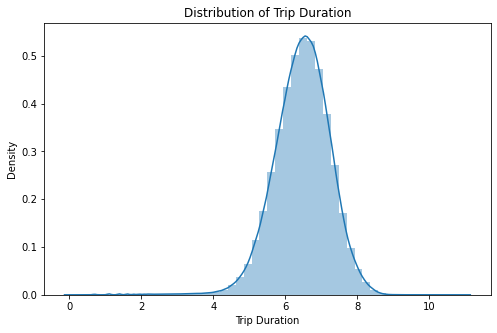

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.distplot(df['trip_duration']).set_title("Distribution of Trip Duration")
plt.xlabel("Trip Duration")

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor

In [67]:
X = df.drop("trip_duration", axis=1)
y = df.trip_duration.values

In [68]:
X.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,geodesic_distance
0,1,-73.982155,40.767937,-73.964630,40.765602,3,14,0,17,24,...,-23.477083,-1.682674,-43.677573,1.498521,99.970196,1.498523,1.735436,0.020567,0.749261,1.502172
1,1,-73.980415,40.738564,-73.999481,40.731152,6,12,6,0,43,...,-23.511349,-1.718587,-43.707866,1.805507,-117.153768,1.805510,2.430510,0.025886,0.902755,1.808660
2,1,-73.979027,40.763939,-74.005333,40.710087,1,19,1,11,35,...,-23.511403,-1.717837,-43.708721,6.385098,-159.680165,6.385108,8.203587,0.081391,3.192554,6.379687
3,1,-74.010040,40.719971,-74.012268,40.706718,4,6,2,19,32,...,-23.541551,-1.747821,-43.736987,1.485498,-172.737700,1.485501,1.661334,0.015993,0.742750,1.483632
4,1,-73.973053,40.793209,-73.972923,40.782520,3,26,5,13,30,...,-23.461882,-1.664203,-43.666675,1.188588,179.473585,1.188590,1.199458,0.011067,0.594295,1.187038


In [69]:
y

array([6.12029742, 6.49677499, 7.66105638, ..., 6.63856779, 5.92157842,
       5.28826703])

In [70]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [71]:
X_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,...,rot_45_center_longitude,rot_30_center_latitude,rot_30_center_longitude,haversine_distance,bearing,great_circle_distance,manhattan_distance,pca_manhattan,distance_halved,geodesic_distance
57508,2,-73.996620,40.725525,-74.002350,40.738617,4,17,6,11,43,...,-23.520062,-1.725769,-43.717519,1.533734,-18.345429,1.533737,1.938602,0.018446,0.766868,1.532306
1308763,1,-73.992203,40.729000,-74.001427,40.751621,5,12,3,7,13,...,-23.512348,-1.717298,-43.711086,2.632666,-17.165396,2.632670,3.292608,0.031164,1.316335,2.630096
63470,1,-73.991272,40.729980,-73.985611,40.735310,4,14,3,7,27,...,-23.511848,-1.719750,-43.707668,0.760700,38.830595,0.760701,1.069586,0.010961,0.380351,0.760857
1135872,5,-73.872902,40.773960,-73.790009,40.646931,4,12,1,13,57,...,-23.416554,-1.660482,-43.582818,15.758576,153.653892,15.758598,21.105260,0.207556,7.879299,15.749797
1309342,1,-73.982262,40.776176,-73.947662,40.827801,1,10,6,17,3,...,-23.446222,-1.647959,-43.652663,6.436853,26.888888,6.436862,8.653779,0.086943,3.218431,6.433558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259522,1,-73.991211,40.739220,-73.986351,40.729549,2,6,5,18,45,...,-23.510858,-1.718413,-43.707092,1.150614,159.150862,1.150615,1.484739,0.014282,0.575308,1.149665
1416340,2,-73.984711,40.753361,-73.977440,40.755756,5,4,2,11,58,...,-23.491147,-1.697090,-43.690332,0.667857,66.490644,0.667858,0.878826,0.009421,0.333929,0.669151
132098,1,-73.977760,40.746284,-73.953346,40.771465,3,29,1,21,42,...,-23.477122,-1.685591,-43.674732,3.473940,36.285559,3.473945,4.856678,0.049574,1.736973,3.474095
672051,1,-73.999260,40.722309,-74.007507,40.723324,3,17,3,15,22,...,-23.529361,-1.735733,-43.725522,0.704120,-80.776291,0.704121,0.807858,0.009599,0.352061,0.705846


In [72]:
import xgboost as xgb

#Best Parameters
param = {"booster":"gbtree", 
         "objective":"reg:linear",
        'eval_metric': 'rmse',
        'eta': 0.2,
        'gamma': 1,
        'max_depth': 10,
        'subsample': 0.8,
         'colsample_bytree': 0.3,
         'learning_rate':      0.1,
         'min_child_weight': 50,
}


In [73]:
train_dmatrix = xgb.DMatrix(X_train, y_train)
test_dmatrix = xgb.DMatrix(X_test, y_test)
# train_dmatrix = xgb.DMatrix(X, y)
# test_dmatrix = xgb.DMatrix(df2)

In [74]:
# train_dmatrix = xgb.DMatrix(X, y) #training dataset
# test_dmatrix = xgb.DMatrix(df2) #testing dataset

## Tune Hyperparameters Here

In [75]:
# params = []

# for min_child_weight in [1, 10, 50, 100]:
#     for eta in [0.05, 0.1, 0.2]:
#         for colsample_bytree in [0.3, 0.4, 0.5]:
#             for max_depth in [6, 8, 10]:
#                 for subsample in [0.6, 0.7, 0.8]:
#                     params.append({'min_child_weight': min_child_weight, 
#                                                 'eta': eta, 
#                                                 'colsample_bytree': colsample_bytree, 
#                                                 'max_depth': max_depth,
#                                                 'subsample': subsample, 
#                                                 'gamma': 1,
#                                                 'learning_rate': 0.1,
#                                                 'booster' : 'gbtree', 
#                                                 'eval_metric': 'rmse',
#                                                 'objective': 'reg:linear'
#                     })

# params

In [76]:
# from datetime import datetime

# min_rmse = float("Inf")
# best_params = None

# for param in params:
#     print("Time now is: {}".format(datetime.now()))
#     print("CV with min_child_weight={}, eta={}, colsample_bytree={}, max_depth={}, subsample={}".format(
#         param['min_child_weight'],
#         param['eta'],
#         param['colsample_bytree'],
#         param['max_depth'],
#         param['subsample'],
#     ))
    
#     # CROSS VALIDATION
#     cv_results = xgb.cv(
#         param,
#         train_DMatrix,
#         num_boost_round=1000,
#         seed=42,
#         nfold=5,
#         metrics={'rmse'},
#         early_stopping_rounds=10,
#         maximize=False
#     )
    
#     mean_rmsle = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmsle, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (
#             param['min_child_weight'],
#             param['eta'],
#             param['colsample_bytree'],
#             param['max_depth'],
#             param['subsample'],
#         )
    
# print("Best params: min_child_weight={}, eta={}, colsample_bytree={}, max_depth={}, subsample={}, RMSE: {}".format(
#     best_params[0], 
#     best_params[1],
#     best_params[2],
#     best_params[3],
#     best_params[4],
#     min_rmse
# ))

In [77]:
watchlist = [(train_dmatrix, 'train'),(test_dmatrix, 'test')]

xgb_r = xgb.train(param, 
                 train_dmatrix, 
                 1000,
                  watchlist,
                  early_stopping_rounds=50,
                  maximize=False,
                  verbose_eval=10
                )
pred = xgb_r.predict(test_dmatrix)

[18:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.41092	test-rmse:5.41141
[10]	train-rmse:1.92643	test-rmse:1.92710
[20]	train-rmse:0.76118	test-rmse:0.76380
[30]	train-rmse:0.43481	test-rmse:0.44131
[40]	train-rmse:0.36475	test-rmse:0.37430
[50]	train-rmse:0.34825	test-rmse:0.36027
[60]	train-rmse:0.34146	test-rmse:0.35552
[70]	train-rmse:0.33640	test-rmse:0.35232
[80]	train-rmse:0.33339	test-rmse:0.35082
[90]	train-rmse:0.32963	test-rmse:0.34869
[100]	train-rmse:0.32679	test-rmse:0.34741
[110]	train-rmse:0.32491	test-rmse:0.34663
[120]	train-rmse:0.32317	test-rmse:0.34607
[130]	train-rmse:0.32208	test-rmse:0.34569
[140]	train-rmse:0.32002	test-rmse:0.34482
[150]	train-rmse:0.31877	test-rmse:0.34445
[160]	train-rmse:0.31755	test-rmse:0.34402
[170]	train-rmse:0.31686	test-rmse:0.34390
[180]	train-rmse:0.31599	test-rmse:0.34364
[190]	train-rmse:

In [78]:
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(xgb_r.predict(test_dmatrix))))
print("TEST RMSLE")
print("RMSLE : % f" %(rmsle))

TEST RMSLE
RMSLE :  0.338594


In [79]:
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_train), np.exp(xgb_r.predict(train_dmatrix))))
print("TRAIN RMSLE")
print("RMSLE : % f" %(rmsle))

TRAIN RMSLE
RMSLE :  0.298081


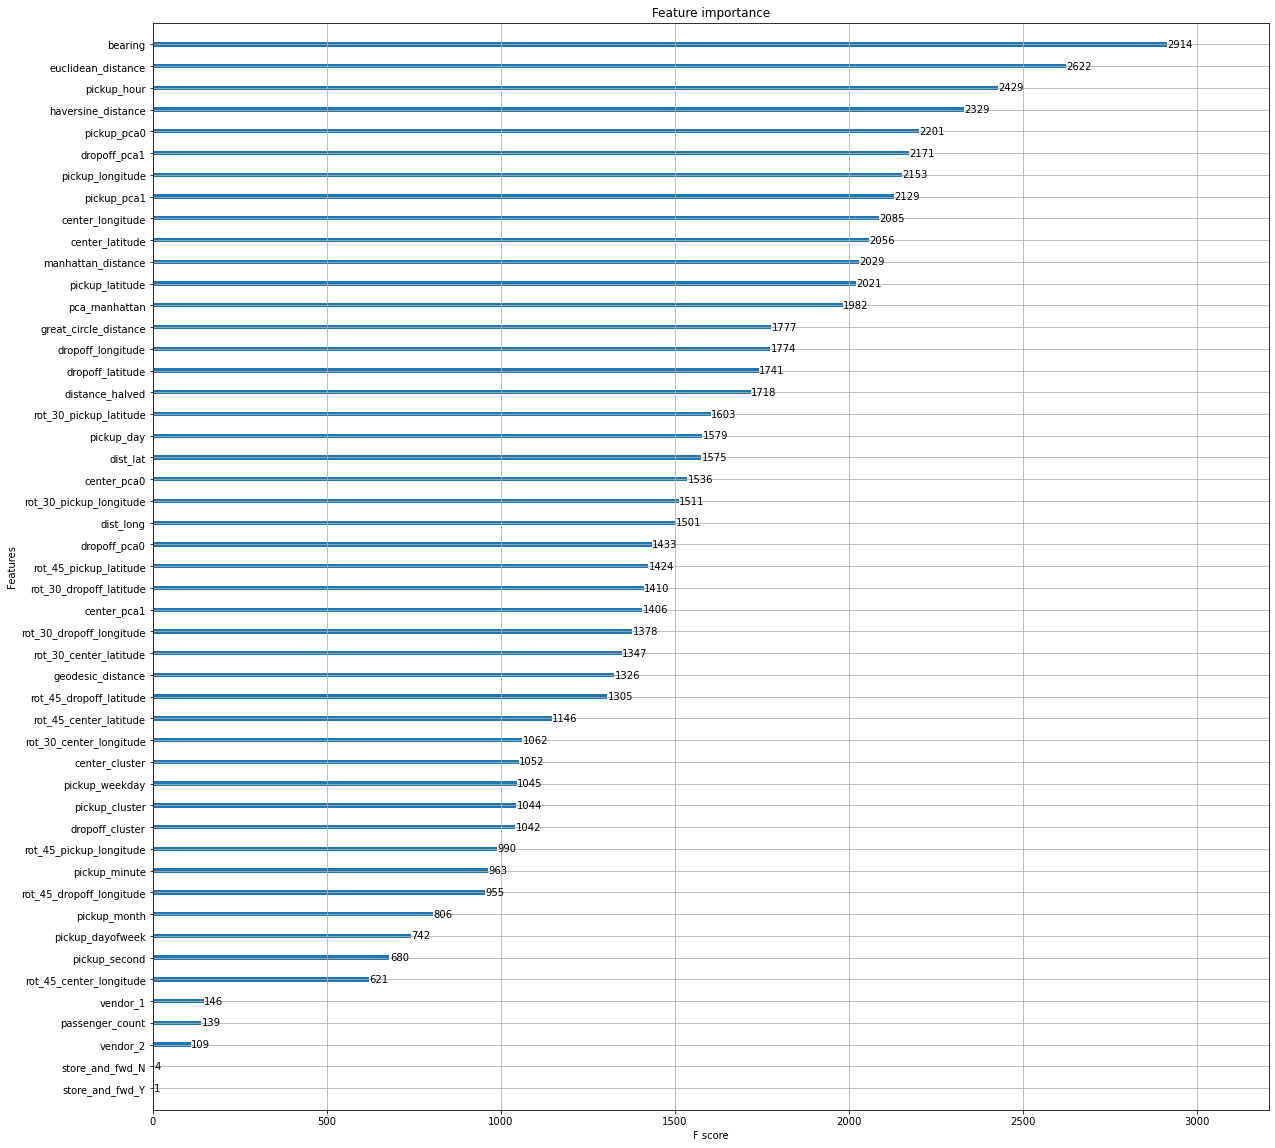

In [80]:
from xgboost import plot_importance
ax = plot_importance(xgb_r)
fig = ax.figure
fig.set_size_inches(20, 20)
plt.show()

In [81]:
train_dmatrix = xgb.DMatrix(X, y) #training dataset
test_dmatrix = xgb.DMatrix(df2) #testing dataset

In [89]:
xgb_r = xgb.train(params = param, 
                 dtrain = train_dmatrix, 
                 num_boost_round = 750,
                )
pred = xgb_r.predict(test_dmatrix)

[19:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
new_pred = np.exp(pred)
new_pred

array([ 789.911 ,  649.0239,  438.9577, ..., 1655.6472, 2086.9658,
       1252.5485], dtype=float32)

In [91]:
df3 = pd.read_csv("taxi/test.csv")
df3

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [92]:
df4 = df3.filter(['id'], axis=1)
df4

,id
0,id3004672
1,id3505355
2,id1217141
3,id2150126
4,id1598245
...,...
625129,id3008929
625130,id3700764
625131,id2568735
625132,id1384355


In [93]:
df4['trip_duration'] = new_pred.tolist()
df4

,id,trip_duration
0,id3004672,789.911011
1,id3505355,649.023926
2,id1217141,438.957703
3,id2150126,860.883240
4,id1598245,343.035156
...,...,...
625129,id3008929,228.502945
625130,id3700764,1300.104370
625131,id2568735,1655.647217
625132,id1384355,2086.965820


In [94]:
df4.to_csv("submission10.csv", index=False)